<a href="https://colab.research.google.com/github/allnes/pcam_train/blob/master/pcam_fcn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
cd  '/content/drive/My Drive/DL_PCAM'

/content/drive/My Drive/DL_PCAM


In [210]:
%ls

camelyonpatch_level_2_split_test_meta.csv
camelyonpatch_level_2_split_test_x.h5
camelyonpatch_level_2_split_test_x.h5.gz
camelyonpatch_level_2_split_test_y.h5
camelyonpatch_level_2_split_test_y.h5.gz
camelyonpatch_level_2_split_train_meta.csv
camelyonpatch_level_2_split_train_x.h5
camelyonpatch_level_2_split_train_x.h5.gz
camelyonpatch_level_2_split_train_y.h5
camelyonpatch_level_2_split_train_y.h5.gz
camelyonpatch_level_2_split_valid_meta.csv
camelyonpatch_level_2_split_valid_x.h5
camelyonpatch_level_2_split_valid_x.h5.gz
camelyonpatch_level_2_split_valid_y.h5
camelyonpatch_level_2_split_valid_y.h5.gz
__pycache__/


In [0]:
import gzip
import shutil
def uzip_file(file_name, origin_name):
  with gzip.open(file_name, 'rb') as f_in:
      with open(origin_name, 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)


In [0]:
train_x_name = 'camelyonpatch_level_2_split_train_x.h5'
train_y_name = 'camelyonpatch_level_2_split_train_y.h5'

test_x_name = 'camelyonpatch_level_2_split_test_x.h5'
test_y_name = 'camelyonpatch_level_2_split_test_y.h5'

valid_x_name = 'camelyonpatch_level_2_split_valid_x.h5'
valid_y_name = 'camelyonpatch_level_2_split_valid_y.h5'

meta_train_name = 'camelyonpatch_level_2_split_train_meta.csv'
meta_valid_name = 'camelyonpatch_level_2_split_valid_meta.csv'
meta_test_name  = 'camelyonpatch_level_2_split_test_meta.csv'

# uzip_file(train_x_name + '.gz', train_x_name)
# uzip_file(train_y_name + '.gz', train_y_name)

# uzip_file(test_x_name + '.gz', test_x_name)
# uzip_file(test_y_name + '.gz', test_y_name)

# uzip_file(valid_x_name + '.gz', valid_x_name)
# uzip_file(valid_y_name + '.gz', valid_y_name)


In [0]:
from keras.utils import HDF5Matrix, normalize
import pandas as pd

# shape_data = [10000, 30000]
# x_train = HDF5Matrix(train_x_name, 'x', 
#                      start=shape_data[0], end=shape_data[1])
# y_train = HDF5Matrix(train_y_name, 'y', 
#                      start=shape_data[0], end=shape_data[1])

# x_valid = HDF5Matrix(valid_x_name, 'x', 
#                      start=shape_data[0], end=shape_data[1])
# y_valid = HDF5Matrix(valid_y_name, 'y', 
#                      start=shape_data[0], end=shape_data[1])

# x_test = HDF5Matrix(test_x_name, 'x', 
#                     start=shape_data[0], end=shape_data[1])
# y_test = HDF5Matrix(test_y_name, 'y', 
#                     start=shape_data[0], end=shape_data[1])

x_train = HDF5Matrix(train_x_name, 'x')
y_train = HDF5Matrix(train_y_name, 'y')

x_valid = HDF5Matrix(valid_x_name, 'x')
y_valid = HDF5Matrix(valid_y_name, 'y')

x_test = HDF5Matrix(test_x_name, 'x')
y_test = HDF5Matrix(test_y_name, 'y')

meta_train = pd.read_csv(meta_train_name)
meta_valid = pd.read_csv(meta_valid_name)
meta_test  = pd.read_csv(meta_test_name)

262144
<class 'keras.utils.io_utils.HDF5Matrix'>
<class 'numpy.ndarray'>
(96, 96, 3)


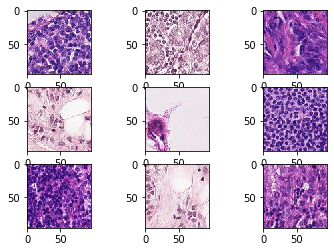

In [214]:
print(len(x_train))
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)
from matplotlib import pyplot
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Reshape, Lambda, Input
from keras.regularizers import l2
import tensorflow as tf

In [0]:
current_core = 32
full_size = current_core * current_core * 3
original_shape = (96, 96, 3)
new_shape = (current_core, current_core, 3)
new_size = (current_core, current_core)

In [0]:
import cv2 as cv
import numpy as np
def resize_for_train(x_array, x_shape):
  return np.array([cv.resize(elem, dsize=x_shape) for elem in x_array])
x_train = resize_for_train(x_train, new_size)
x_valid = resize_for_train(x_valid, new_size)
x_test  = resize_for_train(x_test,  new_size)

In [218]:
model = Sequential([
    # ---------------------------------------------------------#
    Reshape((1, 1, full_size,), input_shape=new_shape),
    # ---------------------------------------------------------#
    Dense(int(full_size / 2), 
          kernel_initializer='random_uniform', 
          bias_initializer='random_uniform'), 
    Activation('relu'),
    # ---------------------------------------------------------#
    Dense(int(full_size / 3), 
          kernel_initializer='random_uniform', 
          bias_initializer='random_uniform'), 
    Activation('relu'),
    # ---------------------------------------------------------#
    Dense(int(full_size / 4), 
          kernel_initializer='random_uniform', 
          bias_initializer='random_uniform'), 
    Activation('relu'),
    # ---------------------------------------------------------#
    Dense(1),                    
    Activation('sigmoid'),
    # ---------------------------------------------------------#
])
# model.build((len(x_train), 96, 96, 3))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 1, 1, 3072)        0         
_________________________________________________________________
dense_49 (Dense)             (None, 1, 1, 1536)        4720128   
_________________________________________________________________
activation_49 (Activation)   (None, 1, 1, 1536)        0         
_________________________________________________________________
dense_50 (Dense)             (None, 1, 1, 1024)        1573888   
_________________________________________________________________
activation_50 (Activation)   (None, 1, 1, 1024)        0         
_________________________________________________________________
dense_51 (Dense)             (None, 1, 1, 768)         787200    
_________________________________________________________________
activation_51 (Activation)   (None, 1, 1, 768)       

In [0]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics = ['accuracy'])

In [220]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 1024

datagen = ImageDataGenerator(
              preprocessing_function=lambda x: x/255.,
              width_shift_range=2,   # randomly shift images horizontally
              height_shift_range=2,  # randomly shift images vertically 
              horizontal_flip=True,  # randomly flip images
              vertical_flip=True)    # randomly flip images

model.fit_generator(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=10, 
    shuffle='batch', 
    validation_data=datagen.flow(x_valid, y_valid, batch_size=batch_size), 
    use_multiprocessing=True)

Epoch 1/10
255/256 [============================>.] - ETA: 0s - loss: 0.6418 - acc: 0.6185Epoch 1/10
Epoch 1/10
256/256 [==============================] - 159s 620ms/step - loss: 0.6419 - acc: 0.6183 - val_loss: 0.6285 - val_acc: 0.6431
Epoch 2/10
256/256 [==============================] - 155s 604ms/step - loss: 0.5991 - acc: 0.6792 - val_loss: 0.5744 - val_acc: 0.7000
Epoch 3/10
256/256 [==============================] - 156s 610ms/step - loss: 0.5750 - acc: 0.7097 - val_loss: 0.5617 - val_acc: 0.7191
Epoch 4/10
256/256 [==============================] - 156s 609ms/step - loss: 0.5568 - acc: 0.7269 - val_loss: 0.5781 - val_acc: 0.7111
Epoch 5/10
256/256 [==============================] - 157s 613ms/step - loss: 0.5462 - acc: 0.7354 - val_loss: 0.5507 - val_acc: 0.7217
Epoch 6/10
256/256 [==============================] - 156s 610ms/step - loss: 0.5354 - acc: 0.7436 - val_loss: 0.5334 - val_acc: 0.7299
Epoch 7/10
256/256 [==============================] - 156s 609ms/step - loss: 0.530

In [221]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy * 100))

262144/262144 [==============================] - 91s 348us/step
Accuracy: 74.20
